<a href="https://colab.research.google.com/github/yuenherny/r-conference-2023-labs/blob/main/Stat_ML_Survival_Data_R_Conference_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("flexserv")
install.packages("NeuralNetTools")
install.packages("partykit")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘flexserv’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’




In [ ]:
# Load the essential libraries
library(survival)
library(MASS)
library(flexserv)
library(nnet)
library(NeuralNetTools)
library(rpart)
library(partykit)

ERROR: ignored

In [ ]:
install.packages("partykit")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘Formula’, ‘inum’




In [ ]:
library(flexsurv)
library(partykit)

ERROR: ignored

# Slide 7
# Survival Functions
## Survival and Cumulative Distribution Function of Exponential Distribution

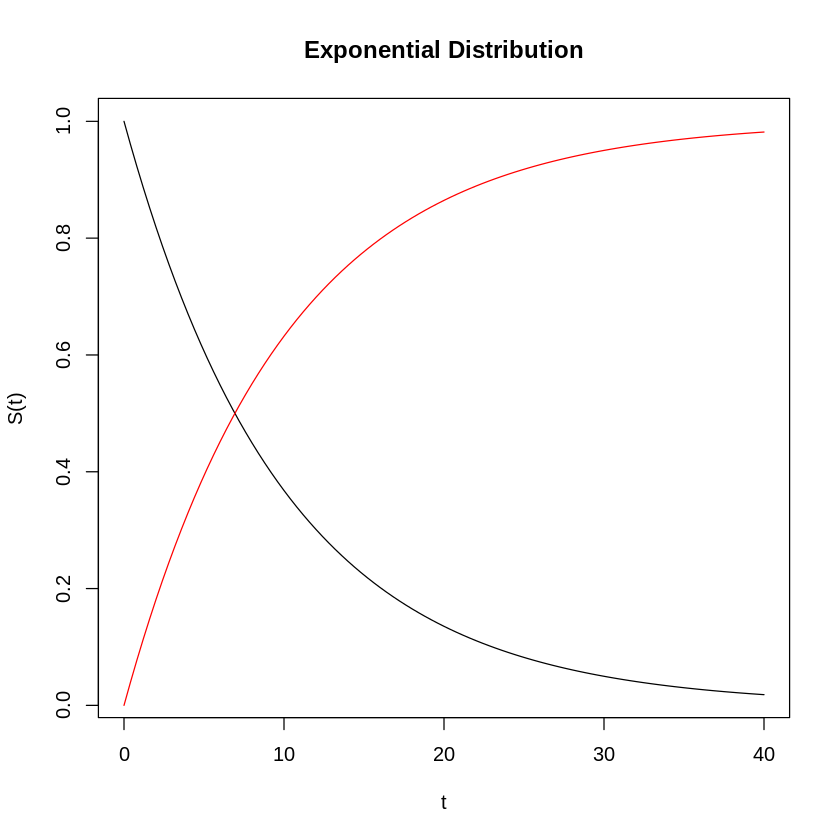

In [ ]:
curve(1-pexp(x,1/10),0,40,ylab="S(t)",xlab="t")
curve(pexp(x,1/10),0,40,add=TRUE,col="red")
title(main="Exponential Distribution")


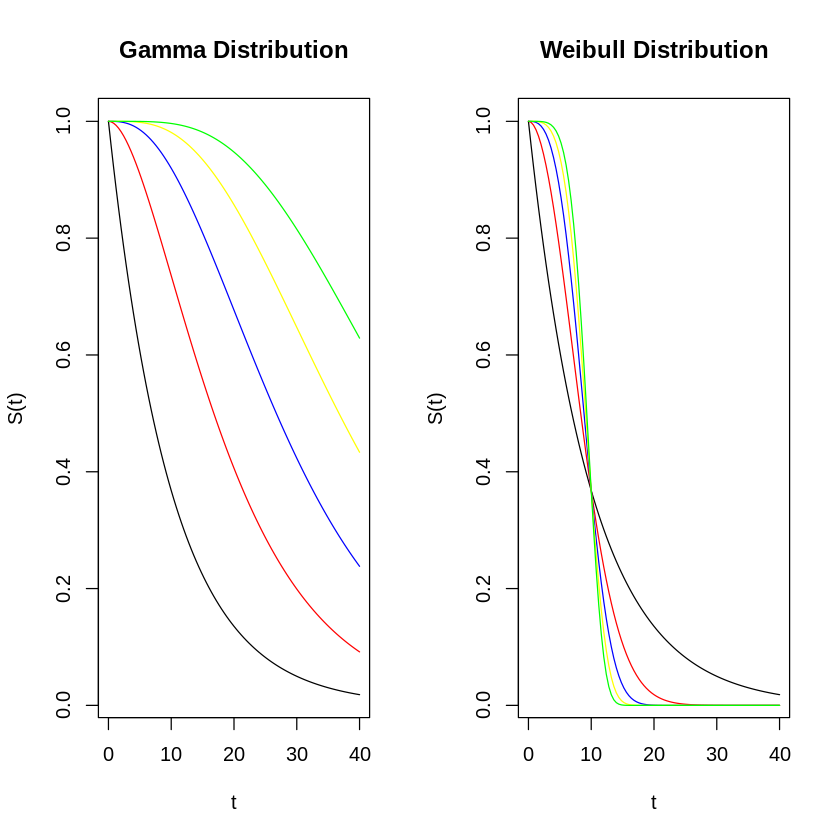

In [ ]:
# Gamma and Weibull Distribution Survival Functions
par(mfrow=c(1,2))
curve(1-pgamma(x,rate=1/10,shape=1),0,40,ylab="S(t)",xlab="t")
curve(1-pgamma(x,rate=1/10,shape=2),add=TRUE,col="red")
curve(1-pgamma(x,rate=1/10,shape=3),add=TRUE,col="blue")
curve(1-pgamma(x,rate=1/10,shape=4),add=TRUE,col="yellow")
curve(1-pgamma(x,rate=1/10,shape=5),add=TRUE,col="green")
title(main="Gamma Distribution")
curve(1-pweibull(x,scale=10,shape=1),0,40,ylab="S(t)",xlab="t")
curve(1-pweibull(x,scale=10,shape=2),add=TRUE,col="red")
curve(1-pweibull(x,scale=10,shape=3),add=TRUE,col="blue")
curve(1-pweibull(x,scale=10,shape=4),add=TRUE,col="yellow")
curve(1-pweibull(x,scale=10,shape=5),add=TRUE,col="green")
title(main="Weibull Distribution")


# Slide 10
## Fitting Exponential Distribution to Boeing's Airconditioner data


In [ ]:
ACD <- read.csv("Boeing.csv",header=TRUE)


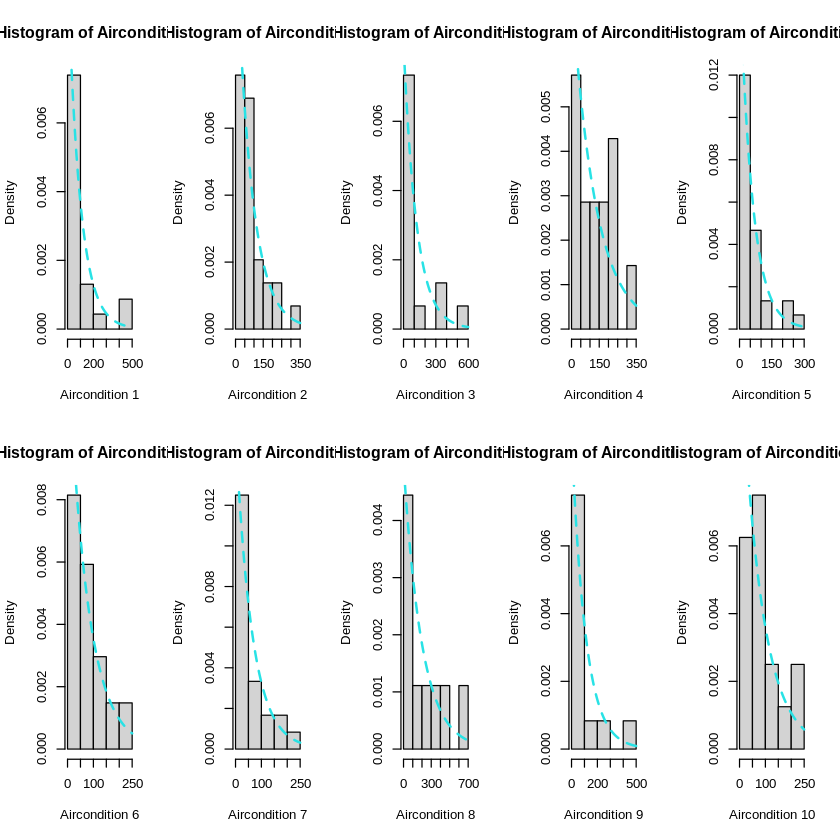

In [ ]:
par(mfrow = c(2,5))
for(i in 1:ncol(ACD)) {
  hist(as.numeric(na.omit(ACD[,i])),
       main=paste("Histogram of Aircondition",i),
       xlab=paste("Aircondition",i),freq = FALSE)
  curve(dexp(x,1/mean(as.numeric(na.omit(ACD[,i])))),
        col = 5, lty = 2, lwd = 2, add = TRUE)
}


In [ ]:
# Fit distribution using fitdistr from MASS package
t1 <- as.numeric(na.omit(ACD[,1]))
t1_exp <- fitdistr(t1,densfun = "exponential")
t1_exp
1/mean(t1)
-2*t1_exp$loglik + 2 # AIC
mean(t1); median(t1)
1/median(t1)
-2*(length(t1)*log(1/median(t1))-sum(t1)/median(t1))+2


      rate    
  0.010449796 
 (0.002178933)

[1] 0.0104498

[1] 257.814

[1] 95.69565

[1] 57

[1] 0.01754386

[1] 265.2084

# Slide 12
## Introducing the PBC Dataset

In [ ]:
data(pbc)
names(pbc)
?pbc
sapply(pbc,class)
summary(pbc)
sort(pbc$time)
Surv(pbc$time,pbc$status==2)


[1] "id"       "time"     "status"   "trt"      "age"      "sex"     
 [7] "ascites"  "hepato"   "spiders"  "edema"    "bili"     "chol"    
[13] "albumin"  "copper"   "alk.phos" "ast"      "trig"     "platelet"
[19] "protime"  "stage"

id      time    status       trt       age       sex   ascites    hepato 
"integer" "integer" "integer" "integer" "numeric"  "factor" "integer" "integer" 
  spiders     edema      bili      chol   albumin    copper  alk.phos       ast 
"integer" "numeric" "numeric" "integer" "numeric" "integer" "numeric" "numeric" 
     trig  platelet   protime     stage 
"integer" "integer" "numeric" "integer"

       id             time          status            trt       
 Min.   :  1.0   Min.   :  41   Min.   :0.0000   Min.   :1.000  
 1st Qu.:105.2   1st Qu.:1093   1st Qu.:0.0000   1st Qu.:1.000  
 Median :209.5   Median :1730   Median :0.0000   Median :1.000  
 Mean   :209.5   Mean   :1918   Mean   :0.8301   Mean   :1.494  
 3rd Qu.:313.8   3rd Qu.:2614   3rd Qu.:2.0000   3rd Qu.:2.000  
 Max.   :418.0   Max.   :4795   Max.   :2.0000   Max.   :2.000  
                                                 NA's   :106    
      age        sex        ascites            hepato          spiders      
 Min.   :26.28   m: 44   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:42.83   f:374   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :51.00           Median :0.00000   Median :1.0000   Median :0.0000  
 Mean   :50.74           Mean   :0.07692   Mean   :0.5128   Mean   :0.2885  
 3rd Qu.:58.24           3rd Qu.:0.00000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :78.44    

[1]   41   41   43   51   71   77   94  110  111  130  131  140  179  186  191
 [16]  193  198  207  216  221  223  249  264  264  304  321  326  334  348  359
 [31]  388  400  460  466  489  515  533  549  552  559  597  597  611  617  625
 [46]  662  673  681  691  694  703  708  727  732  733  737  750  762  769  778
 [61]  785  786  788  790  791  797  799  824  837  839  850  853  859  877  890
 [76]  901  904  930  935  939  943  943  971  974  976  980  989  990  994  999
 [91] 1000 1012 1022 1030 1037 1055 1067 1067 1072 1077 1080 1083 1084 1086 1092
[106] 1095 1097 1103 1119 1129 1141 1149 1150 1152 1153 1165 1168 1170 1170 1191
[121] 1191 1197 1212 1216 1216 1217 1223 1230 1234 1235 1236 1250 1260 1271 1293
[136] 1295 1297 1300 1301 1302 1320 1321 1328 1329 1329 1343 1347 1349 1350 1356
[151] 1360 1363 1363 1367 1368 1375 1401 1408 1412 1413 1418 1419 1420 1427 1433
[166] 1434 1434 1435 1443 1444 1447 1455 1457 1462 1478 1481 1487 1492 1504 1518
[181] 1525 1536 1542 1558 1560 1568 1569 1576 1581 1592 1614 1614 1615 1616 1635
[196] 1639 1653 1654 1656 1657 1666 1677 1680 1682 1690 1690 1701 1702 1725 1735
[211] 1741 1746 1765 1769 1770 1776 1783 1785 1786 1790 1810 1827 1831 1832 1847
[226] 1874 1882 1882 1899 1908 1925 1925 1932 1945 1951 1967 1978 1979 1980 1987
[241] 2011 2022 2033 2050 2055 2071 2081 2090 2103 2105 2106 2111 2149 2157 2168
[256] 2170 2171 2176 2178 2195 2202 2216 2221 2224 2224 2241 2249 2255 2256 2267
[271] 2272 2286 2288 2294 2297 2301 2318 2330 2332 2338 2350 2357 2363 2365 2386
[286] 2400 2403 2419 2443 2449 2452 2456 2466 2468 2475 2503 2504 2504 2527 2534
[301] 2537 2540 2555 2556 2563 2563 2573 2574 2576 2580 2583 2598 2609 2615 2624
[316] 2635 2644 2657 2666 2689 2692 2698 2713 2716 2721 2769 2772 2796 2797 2812
[331] 2834 2835 2844 2847 2855 2863 2870 2891 2944 2976 2990 2995 3021 3030 3050
[346] 3059 3069 3086 3090 3092 3098 3099 3149 3150 3157 3170 3222 3231 3239 3244
[361] 3255 3282 3297 3336 3358 3388 3395 3422 3428 3445 3445 3458 3468 3492 3495
[376] 3523 3527 3561 3574 3577 3581 3584 3611 3672 3707 3762 3820 3823 3839 3850
[391] 3853 3913 3933 3992 4025 4032 4039 4050 4062 4079 4127 4184 4190 4191 4196
[406] 4214 4232 4256 4365 4427 4453 4459 4467 4500 4509 4523 4556 4795

  [1]  400  4500+ 1012  1925  1504+ 2503  1832+ 2466  2400    51  3762   304 
 [13] 3577+ 1217  3584  3672+  769   131  4232+ 1356  3445+  673   264  4079 
 [25] 4127+ 1444    77   549  4509+  321  3839  4523+ 3170  3933+ 2847  3611+
 [37]  223  3244  2297  4467+ 1350  4453+ 4556+ 3428  4025+ 2256  2576+ 4427+
 [49]  708  2598  3853  2386  1000  1434  1360  1847  3282  4459+ 2224  4365+
 [61] 4256+ 3090   859  1487  3992+ 4191  2769  4039+ 1170  3458+ 4196+ 4184+
 [73] 4190+ 1827  1191    71   326  1690  3707+  890  2540  3574  4050+ 4032+
 [85] 3358  1657   198  2452+ 1741  2689   460   388  3913+  750   130  3850+
 [97]  611  3823+ 3820+  552  3581+ 3099+  110  3086  3092+ 3222  3388+ 2583 
[109] 2504+ 2105  2350+ 3445   980  3395  3422+ 3336+ 1083  2288   515  2033+
[121]  191  3297+  971  3069+ 2468+  824  3255+ 1037  3239+ 1413   850  2944+
[133] 2796  3149+ 3150+ 3098+ 2990+ 1297  2106+ 3059+ 3050+ 2419   786   943 
[145] 2976+ 2615+ 2995+ 1427   762  2891+ 2870+ 1152  2863+  140

# Slide 16
## Hazard Rate Plots


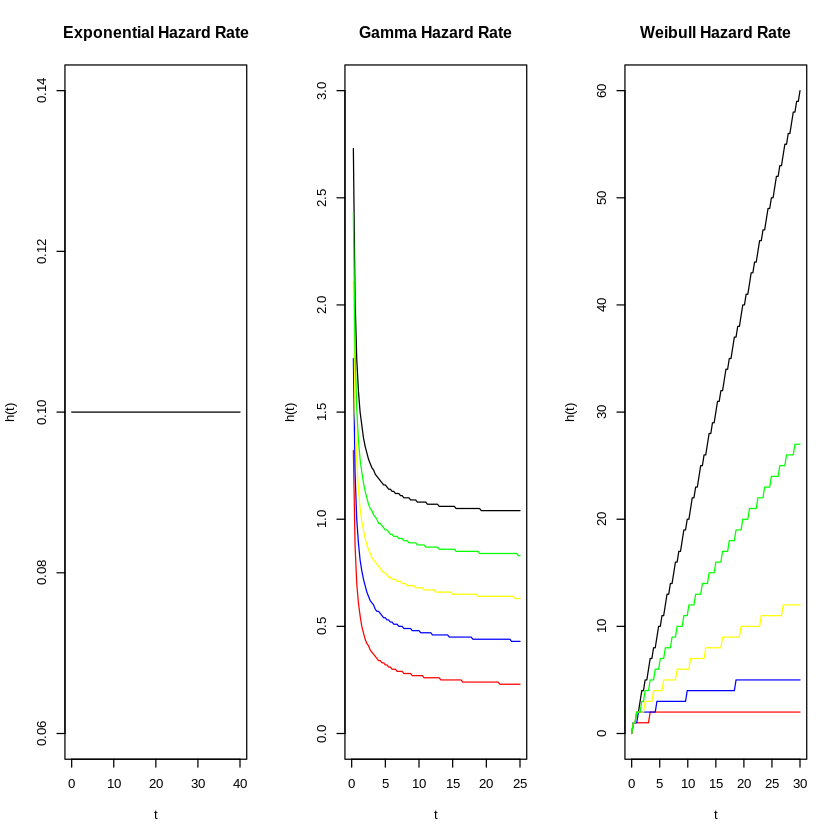

In [ ]:
par(mfrow=c(1,3))
hexp <- function(x,rate) round(dexp(x,rate)/(1-pexp(x,rate)),2)
curve(hexp(x,rate=1/10),0,40,ylab="h(t)",xlab="t")
title(main="Exponential Hazard Rate")

hgamma <- function(x,rate,shape) round(dgamma(x,rate,shape)/(1-pgamma(x,rate,shape)),2)
curve(hgamma(x,rate=1/10,shape=1),0,25,ylab="h(t)",xlab="t",ylim=c(0,3))
curve(hgamma(x,rate=1/10,shape=0.2),add=TRUE,col="red")
curve(hgamma(x,rate=1/10,shape=0.4),add=TRUE,col="blue")
curve(hgamma(x,rate=1/10,shape=0.6),add=TRUE,col="yellow")
curve(hgamma(x,rate=1/10,shape=0.8),add=TRUE,col="green")
title(main="Gamma Hazard Rate")
hweibull <- function(x,scale,shape) round(scale^shape*shape*x^(shape-1))
curve(hweibull(x,scale=1,shape=2),0,30,ylab="h(t)",xlab="t",ylim=c(0,60))
curve(hweibull(x,scale=1,shape=1.2),add=TRUE,col="red")
curve(hweibull(x,scale=1,shape=1.4),add=TRUE,col="blue")
curve(hweibull(x,scale=1,shape=1.6),add=TRUE,col="yellow")
curve(hweibull(x,scale=1,shape=1.8),add=TRUE,col="green")
title(main="Weibull Hazard Rate")


# Slide 19
## Fitting Parametric Distributions

In [ ]:
pbc_weibull <- flexsurvreg(Surv(time,status==2)~1, data=pbc,dist="weibull")
pbc_weibull
pbc_lognormal <- flexsurvreg(Surv(time,status==2)~1, data=pbc,dist="lognormal")
pbc_lognormal


Call:
flexsurvreg(formula = Surv(time, status == 2) ~ 1, data = pbc, 
    dist = "weibull")

Estimates: 
       est       L95%      U95%      se      
shape  1.08e+00  9.42e-01  1.24e+00  7.48e-02
scale  4.71e+03  3.96e+03  5.59e+03  4.13e+02

N = 418,  Events: 161,  Censored: 257
Total time at risk: 801633
Log-likelihood = -1531.017, df = 2
AIC = 3066.035


Call:
flexsurvreg(formula = Surv(time, status == 2) ~ 1, data = pbc, 
    dist = "lognormal")

Estimates: 
         est     L95%    U95%    se    
meanlog  8.2414  8.0280  8.4549  0.1089
sdlog    1.5468  1.3725  1.7432  0.0943

N = 418,  Events: 161,  Censored: 257
Total time at risk: 801633
Log-likelihood = -1535.861, df = 2
AIC = 3075.721


# Slide 23
# # The Nelson-Aalen Cumulative Hazard Function for D-penicillamine

[1] 418


  1   2 
158 154 


   1    2 <NA> 
 158  154  106 

[1] 158   2

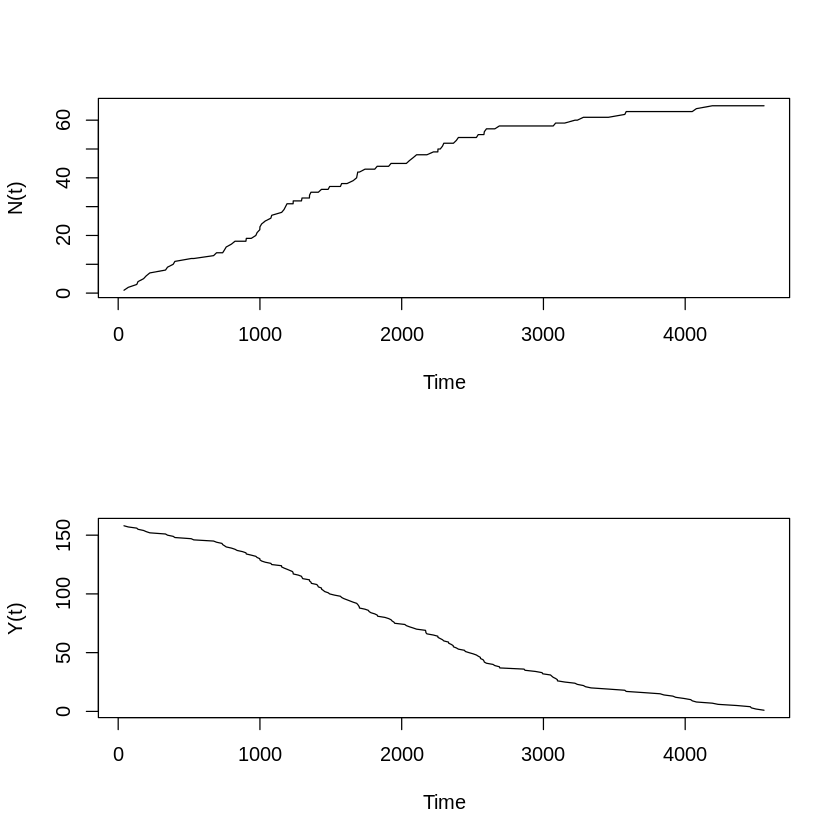

In [ ]:
data(pbc)
nrow(pbc)
table(pbc$trt)
table(pbc$trt,exclude=NULL)
# Obtain the Nelson-Aalen Estimator for D-penicillamine drug
pbc.D <- subset(pbc,trt==1,select = c(time,status))
dim(pbc.D)
DSurv <- Surv(pbc.D$time,pbc.D$status==2)
DSurvFit <- survfit(DSurv~1)
par(mfrow=c(2,1))
# Plotting the counting process against the time
plot(DSurvFit$time,cumsum(DSurvFit$n.event),"l",xlab="Time",ylab="N(t)")
# Plotting the at-risk process against the time
plot(DSurvFit$time,DSurvFit$n.risk,"l",xlab="Time",ylab="Y(t)")


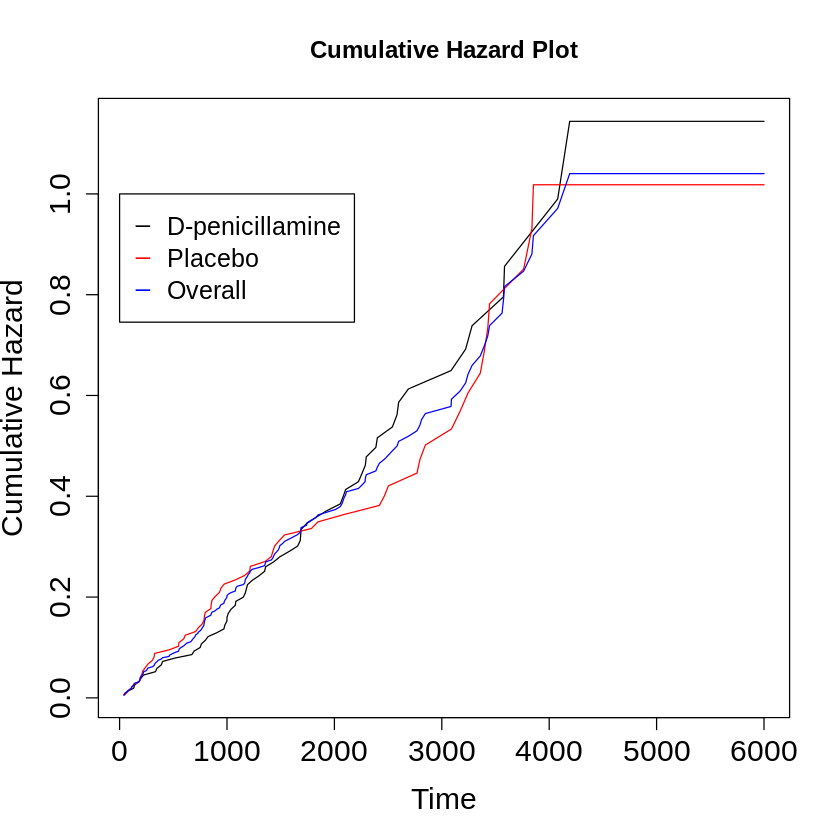

In [ ]:
# The Nelson-Aalen Estimator for the PBC Dataset
DSurvSumm <- summary(DSurvFit)
DHaz <- -log(DSurvSumm$surv)
DTime <- c(DSurvSumm$time,6000)
DHaz <- c(DHaz,tail(DHaz,1))
plot(DTime,DHaz,xlab="Time",ylab="Cumulative Hazard",
     main="Cumulative Hazard Plot","l",
     cex.axis = 1.5,cex.lab = 1.5)
# Repeating the plots with overall Placebo and overall data
# Adding Placebo
pbc.P <- subset(pbc,trt==2,select = c(time,status))
PSurvSumm <- summary(survfit(Surv(pbc.P$time,pbc.P$status==2)~1))
PHaz <- -log(PSurvSumm$surv)
PTime <- c(PSurvSumm$time,6000)
PHaz <- c(PHaz,tail(PHaz,1))
points(PTime,PHaz,"l",col="red")
# All data
pbc.A <- subset(pbc,select = c(time,status))
ASurvSumm <- summary(survfit(Surv(pbc.A$time,pbc.A$status==2)~1))
AHaz <- -log(ASurvSumm$surv)
ATime <- c(ASurvSumm$time,6000)
AHaz <- c(AHaz,tail(AHaz,1))
points(ATime,AHaz,"l",col="blue")
legend(0,1,c("D-penicillamine","Placebo","Overall"),
       col=c("black","red","blue"),pch="_",cex=1.25)


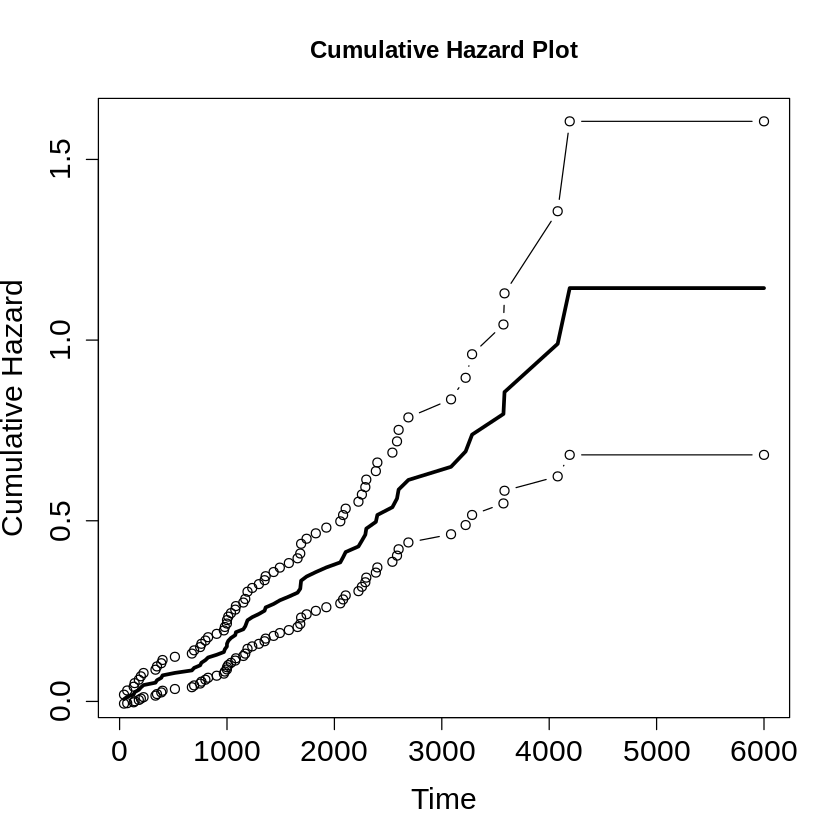

In [ ]:
# Standard Error and Confidence Interval for D-penicillamine
DDecVar <- DSurvSumm$n.event/DSurvSumm$n.risk^2 #variance decrements
DVar <- cumsum(DDecVar) # the variance of NA at time t
DStdDev <- sqrt(DVar) # Standard Deviation
DStdDev <- c(DStdDev,tail(DStdDev,1))
alpha <- 0.05
DUL <- DHaz + qnorm(1-alpha/2)*DStdDev # Upper limit
DLL <- DHaz + qnorm(alpha/2)*DStdDev # Lower limit
plot(DTime,DUL,xlab="Time",ylab="Cumulative Hazard",
     main="Cumulative Hazard Plot","b",
     cex.axis = 1.5,cex.lab = 1.5)
points(DTime,DHaz,"l",lwd=3)
points(DTime,DLL,"b")


Call: survfit(formula = Surv_PBC ~ trt, data = pbc)

   106 observations deleted due to missingness 
        n events median 0.95LCL 0.95UCL
trt=1 158     65   3282    2583      NA
trt=2 154     60   3428    3090      NA
Call: survfit(formula = Surv_PBC ~ sex, data = pbc)

        n events median 0.95LCL 0.95UCL
sex=m  44     24   2386    1536      NA
sex=f 374    137   3445    3170      NA


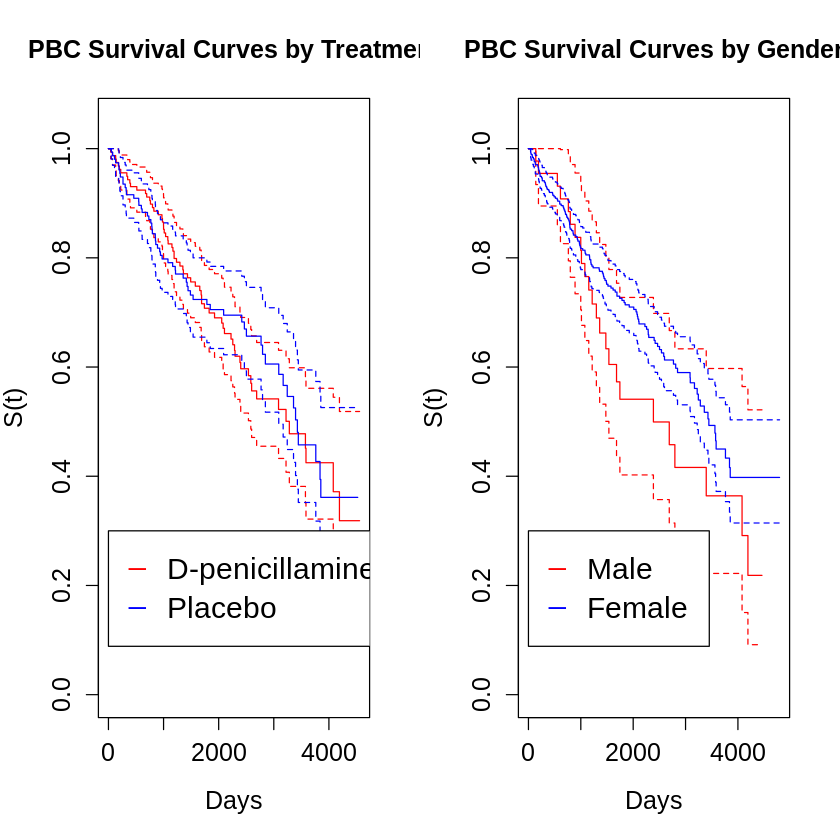

In [ ]:
# Kaplan-Meier Estimates
par(mfrow=c(1,2))
Surv_PBC <- Surv(pbc$time,pbc$status==2)
KM_TRT <- survfit(Surv_PBC~trt,data=pbc)
print(KM_TRT)
plot(KM_TRT,col=c("red","blue"),conf.int = TRUE,
     xlab="Days",ylab="S(t)",ylim=c(0,1.05),
     cex.axis = 1.25,cex.lab = 1.25)
legend(0,0.3,c("D-penicillamine","Placebo"),pch="_",
       col=c("red","blue"),cex=1.5)
title(main="PBC Survival Curves by Treatment",cex.main=1.25)

KM_Sex <- survfit(Surv_PBC~sex,data=pbc)
print(KM_Sex)
plot(KM_Sex,col=c("red","blue"),conf.int = TRUE,
     xlab="Days",ylab="S(t)",ylim=c(0,1.05),
     cex.axis = 1.25,cex.lab = 1.25)
legend(0,0.3,c("Male","Female"),pch="_",
       col=c("red","blue"),cex=1.5)
title(main="PBC Survival Curves by Gender",cex.main=1.25)


In [ ]:
# The Median and Mean Survival Times
survfit(DSurv~1)
pbcSurv <- Surv(pbc$time,pbc$status==2)
survfit(pbcSurv~trt,data=pbc)
survfit(pbcSurv~trt+sex,data=pbc)
print(survfit(DSurv~1),print.rmean = TRUE)
print(survfit(DSurv~1),print.rmean = TRUE,rmean=3000)
print(survfit(pbcSurv~trt,data=pbc),print.rmean = TRUE)
print(survfit(pbcSurv~trt+sex,data=pbc),print.rmean = TRUE)


Call: survfit(formula = DSurv ~ 1)

       n events median 0.95LCL 0.95UCL
[1,] 158     65   3282    2583      NA

Call: survfit(formula = pbcSurv ~ trt, data = pbc)

   106 observations deleted due to missingness 
        n events median 0.95LCL 0.95UCL
trt=1 158     65   3282    2583      NA
trt=2 154     60   3428    3090      NA

Call: survfit(formula = pbcSurv ~ trt + sex, data = pbc)

   106 observations deleted due to missingness 
               n events median 0.95LCL 0.95UCL
trt=1, sex=m  21     14   1682    1152      NA
trt=1, sex=f 137     51   3574    2598      NA
trt=2, sex=m  15      8   2796    1217      NA
trt=2, sex=f 139     52   3428    3170      NA

Call: survfit(formula = DSurv ~ 1)

       n events rmean* se(rmean) median 0.95LCL 0.95UCL
[1,] 158     65   2949       142   3282    2583      NA
    * restricted mean with upper limit =  4556 
Call: survfit(formula = DSurv ~ 1)

       n events rmean* se(rmean) median 0.95LCL 0.95UCL
[1,] 158     65   2289      78.1   3282    2583      NA
    * restricted mean with upper limit =  3000 
Call: survfit(formula = pbcSurv ~ trt, data = pbc)

   106 observations deleted due to missingness 
        n events rmean* se(rmean) median 0.95LCL 0.95UCL
trt=1 158     65   2949       142   3282    2583      NA
trt=2 154     60   3003       146   3428    3090      NA
    * restricted mean with upper limit =  4556 
Call: survfit(formula = pbcSurv ~ trt + sex, data = pbc)

   106 observations deleted due to missingness 
               n events rmean* se(rmean) median 0.95LCL 0.95UCL
trt=1, sex=m  21     14   2290       351   1682    1152      NA
trt=1, sex=f 137     51   3081       154   3574    2598

# Slide 25
## k-sample Nonparametric Tests


In [ ]:
data(pbc)
# The Log-rank test
survdiff(Surv(pbc$time,pbc$status==2)~trt,data=pbc)
survdiff(Surv(pbc$time,pbc$status==2)~sex,data=pbc)


Call:
survdiff(formula = Surv(pbc$time, pbc$status == 2) ~ trt, data = pbc)

n=312, 106 observations deleted due to missingness.

        N Observed Expected (O-E)^2/E (O-E)^2/V
trt=1 158       65     63.2    0.0502     0.102
trt=2 154       60     61.8    0.0513     0.102

 Chisq= 0.1  on 1 degrees of freedom, p= 0.7 

Call:
survdiff(formula = Surv(pbc$time, pbc$status == 2) ~ sex, data = pbc)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=m  44       24     17.3     2.640      2.98
sex=f 374      137    143.7     0.317      2.98

 Chisq= 3  on 1 degrees of freedom, p= 0.08 

# Slide 30
## Modeling PBC with Cox PH Model

In [ ]:
pbc2 <- subset(pbc,select=c(time,status,trt,age,sex,
                            edema,bili,albumin))
pbc2 <- na.omit(pbc2)
pbc_ph <- coxph(Surv(time,status==2)~trt+age+sex+
                  edema+bili+albumin,data=pbc2)
summary(pbc_ph)


Call:
coxph(formula = Surv(time, status == 2) ~ trt + age + sex + edema + 
    bili + albumin, data = pbc2)

  n= 312, number of events= 125 

             coef exp(coef)  se(coef)      z Pr(>|z|)    
trt     -0.014276  0.985825  0.185650 -0.077 0.938705    
age      0.031620  1.032125  0.009406  3.362 0.000775 ***
sexf    -0.578187  0.560914  0.247723 -2.334 0.019595 *  
edema    1.022151  2.779165  0.316962  3.225 0.001260 ** 
bili     0.125494  1.133708  0.014851  8.450  < 2e-16 ***
albumin -1.227334  0.293073  0.239965 -5.115 3.14e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

        exp(coef) exp(-coef) lower .95 upper .95
trt        0.9858     1.0144    0.6851    1.4185
age        1.0321     0.9689    1.0133    1.0513
sexf       0.5609     1.7828    0.3452    0.9115
edema      2.7792     0.3598    1.4932    5.1727
bili       1.1337     0.8821    1.1012    1.1672
albumin    0.2931     3.4121    0.1831    0.4691

Concordance= 0.823  (se = 0.02 )
Likeli

,hazard,time
,<dbl>,<dbl>
1,0.001694722,41
2,0.003667269,51
3,0.005730438,71
4,0.007813862,77
5,0.009952227,110
6,0.012095226,130


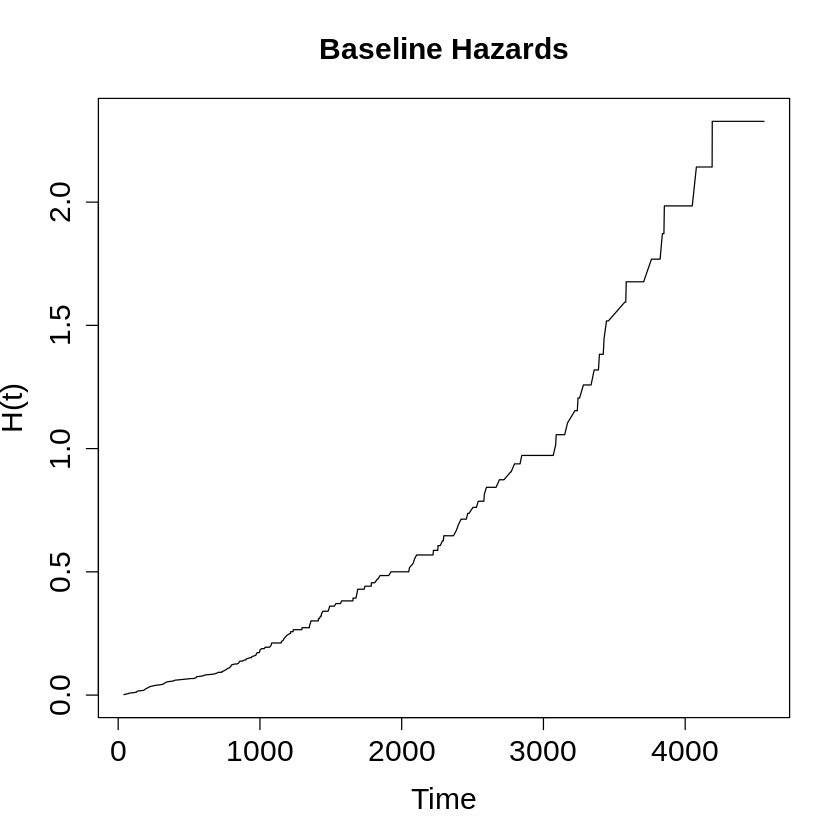

In [ ]:
# Baseline Hazard, Breslow estimator
pbc_baseline <- basehaz(pbc_ph)
head(pbc_baseline)
plot(pbc_baseline$time,pbc_baseline$hazard,"l",
     xlab = "Time",ylab="H(t)",
     main="Baseline Hazards",
     cex.axis = 1.5,cex.lab = 1.5,cex.main=1.5)


# Slide 34
## Neural Networks for Survival Data


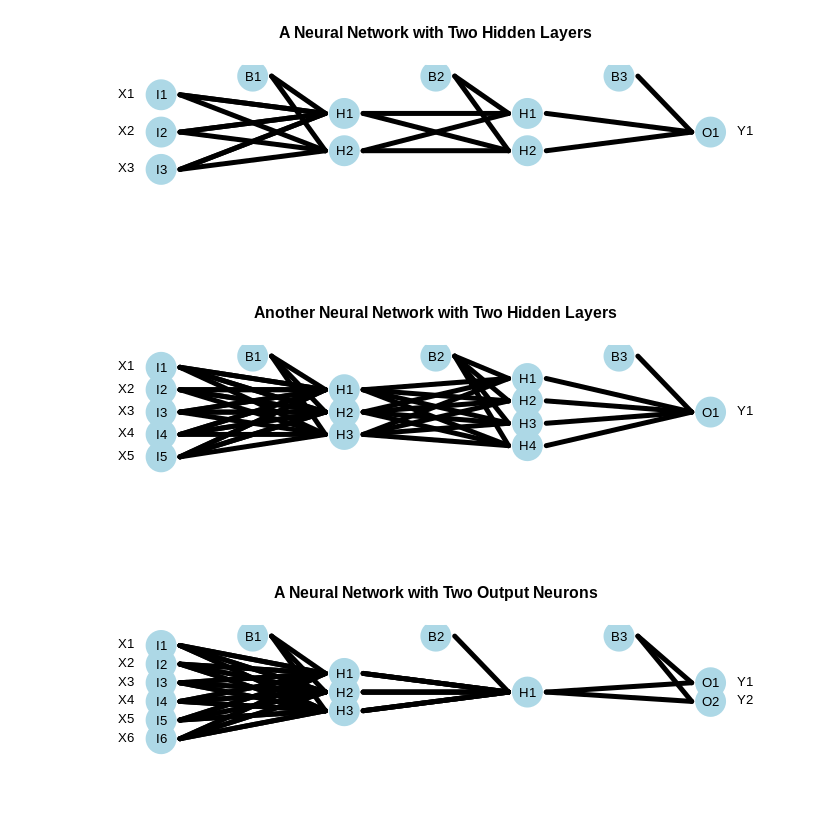

In [ ]:
## View Neural Networks
par(mfrow=c(3,1))
plotnet(rep(0,17),struct=c(3,2,2,1))
title("A Neural Network with Two Hidden Layers")
plotnet(rep(0,39),struct=c(5,3,4,1))
title("Another Neural Network with Two Hidden Layers")
plotnet(rep(0,29),struct=c(6,3,1,2))
title("A Neural Network with Two Output Neurons")


In [ ]:
# Neural Networks on the PBC Data
pbc_nn <- pbc
# Find individuals greater 2000 days and create the indicator
pbc_nn$tg2000 <- ifelse(pbc_nn$time>2000,"Long","Average")
table(pbc_nn$tg2000)
sum(pbc_nn$time <= 2000 & pbc_nn$status!=2)
pbc_nn <- pbc_nn[!(pbc_nn$time <= 2000 & pbc_nn$status!=2),]
pbc_nn <- subset(pbc_nn,select = -c(id,time,status))
pbc_nn$tg2000 <- as.factor(pbc_nn$tg2000)
pbc_nn <- na.omit(pbc_nn)
dim(pbc_nn)
table(pbc_nn$tg2000)



Average    Long 
    240     178 

[1] 122

[1] 199  18


Average    Long 
     77     122 

In [ ]:
# creating the neural network
library(nnet)
pbc_NN_5 <- nnet(tg2000~.,data=pbc_nn,size=5)
pbc_predict_5 <- predict(pbc_NN_5,newdata=pbc_nn,type="class")
sum(pbc_predict_5==pbc_nn$tg2000)
table(pbc_predict_5,pbc_nn$tg2000)
pbc_NN_10 <- nnet(tg2000~.,data=pbc_nn,size=10)
pbc_predict_10 <- predict(pbc_NN_10,newdata=pbc_nn,type="class")
sum(pbc_predict_10==pbc_nn$tg2000)
table(pbc_predict_10,pbc_nn$tg2000)
pbc_NN_20 <- nnet(tg2000~.,data=pbc_nn,size=20)
pbc_predict_20 <- predict(pbc_NN_20,newdata=pbc_nn,type="class")
sum(pbc_predict_20==pbc_nn$tg2000)
table(pbc_predict_20,pbc_nn$tg2000)
pbc_NN_30 <- nnet(tg2000~.,data=pbc_nn,size=30,maxit=200)
pbc_predict_30 <- predict(pbc_NN_30,newdata=pbc_nn,type="class")
sum(pbc_predict_30==pbc_nn$tg2000)
table(pbc_predict_30,pbc_nn$tg2000)
sum(pbc_predict_5==pbc_nn$tg2000)
sum(pbc_predict_10==pbc_nn$tg2000)
sum(pbc_predict_20==pbc_nn$tg2000)
sum(pbc_predict_30==pbc_nn$tg2000)


# weights:  96
initial  value 144.701162 
iter  10 value 131.868289
iter  20 value 131.850588
final  value 131.850572 
converged


[1] 123

             
pbc_predict_5 Average Long
      Average       1    0
      Long         76  122

# weights:  191
initial  value 139.017818 
final  value 132.804075 
converged


[1] 122

              
pbc_predict_10 Average Long
          Long      77  122

# weights:  381
initial  value 235.406752 
iter  10 value 117.454499
iter  20 value 97.632449
iter  30 value 92.057407
iter  40 value 91.231814
iter  50 value 91.145913
iter  60 value 89.487161
iter  70 value 87.152149
iter  80 value 86.011775
iter  90 value 85.209308
iter 100 value 84.972363
final  value 84.972363 
stopped after 100 iterations


[1] 165

              
pbc_predict_20 Average Long
       Average      64   21
       Long         13  101

# weights:  571
initial  value 344.423323 
iter  10 value 115.170851
iter  20 value 106.587254
iter  30 value 106.190046
iter  40 value 103.915498
iter  50 value 103.010126
iter  60 value 102.417320
iter  70 value 101.995155
iter  80 value 101.883846
iter  90 value 100.958739
iter 100 value 100.670493
iter 110 value 100.354086
iter 120 value 100.176343
iter 130 value 99.807599
iter 140 value 99.727970
iter 150 value 99.721373
final  value 99.721342 
converged


[1] 139

              
pbc_predict_30 Average Long
       Average      24    7
       Long         53  115

[1] 123

[1] 122

[1] 165

[1] 139

# Slide 36
## Survival Trees


In [ ]:
options(digits=4)
library(rpart)
# Survival Tree
pbc_stree <- rpart(Surv(time,status==2)~.,data=pbc[,-1])
pbc_coxn <- coxph(Surv(time,status==2)~.,data=pbc[,-1])
pbc_coxn$n
pbc_coxn$nevent
dim(pbc_coxn$y)
dim(pbc_stree$y)
dim(na.omit(pbc))

[1] 276

[1] 111

[1] 276   2

[1] 418   2

[1] 276  20

In [ ]:
pbc_stree

n= 418 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 418 555.700 1.0000  
   2) bili< 2.25 269 232.600 0.4873  
     4) age< 51.24 133  76.380 0.2396  
       8) alk.phos< 1776 103  30.340 0.1037 *
       9) alk.phos>=1776 30  33.090 0.6136 *
     5) age>=51.24 136 136.800 0.7744  
      10) protime< 10.85 98  80.890 0.5121 *
      11) protime>=10.85 38  43.380 1.4340  
        22) age< 65.38 26  24.050 0.9480  
          44) bili< 0.75 8   5.189 0.3150 *
          45) bili>=0.75 18  12.550 1.3800 *
        23) age>=65.38 12   8.392 3.2680 *
   3) bili>=2.25 149 206.500 2.6970  
     6) protime< 11.25 94  98.800 1.7720  
      12) stage< 3.5 57  56.730 1.2620  
        24) age< 43.53 25  16.660 0.6045 *
        25) age>=43.53 32  32.990 1.7990 *
      13) stage>=3.5 37  32.950 2.8310 *
     7) protime>=11.25 55  76.600 5.1840  
      14) ascites< 0.5 41  52.280 4.1600  
        28) age< 42.68 7   6.830 1.4340 *
        29) age>=42.68 34  37.570 5.1140 *
    

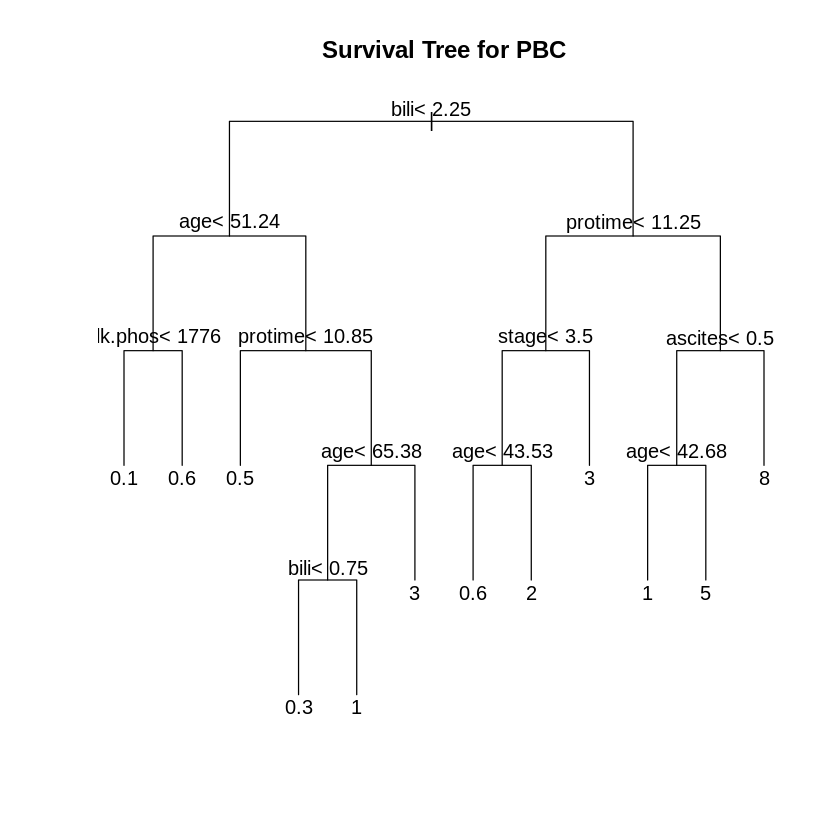

In [ ]:
plot(pbc_stree,uniform=TRUE)
text(pbc_stree)
title(main="Survival Tree for PBC")



Model formula:
Surv(time, status == 2) ~ trt + age + sex + ascites + hepato + 
    spiders + edema + bili + chol + albumin + copper + alk.phos + 
    ast + trig + platelet + protime + stage

Fitted party:
[1] root
|   [2] bili < 2.25
|   |   [3] age < 51.24
|   |   |   [4] alk.phos < 1776: Inf (n = 103)
|   |   |   [5] alk.phos >= 1776: 4191 (n = 30)
|   |   [6] age >= 51.24
|   |   |   [7] protime < 10.85: Inf (n = 98)
|   |   |   [8] protime >= 10.85
|   |   |   |   [9] age < 65.38
|   |   |   |   |   [10] bili < 0.75: Inf (n = 8)
|   |   |   |   |   [11] bili >= 0.75: 3170 (n = 18)
|   |   |   |   [12] age >= 65.38: 1012 (n = 12)
|   [13] bili >= 2.25
|   |   [14] protime < 11.25
|   |   |   [15] stage < 3.5
|   |   |   |   [16] age < 43.53: 3839 (n = 25)
|   |   |   |   [17] age >= 43.53: 1746 (n = 32)
|   |   |   [18] stage >= 3.5: 1165 (n = 37)
|   |   [19] protime >= 11.25
|   |   |   [20] ascites < 0.5
|   |   |   |   [21] age < 42.68: 3428 (n = 7)
|   |   |   |   [22] age >= 

[1]  222  Inf 1012 3839 3170  625 1165 4191 1746 3428

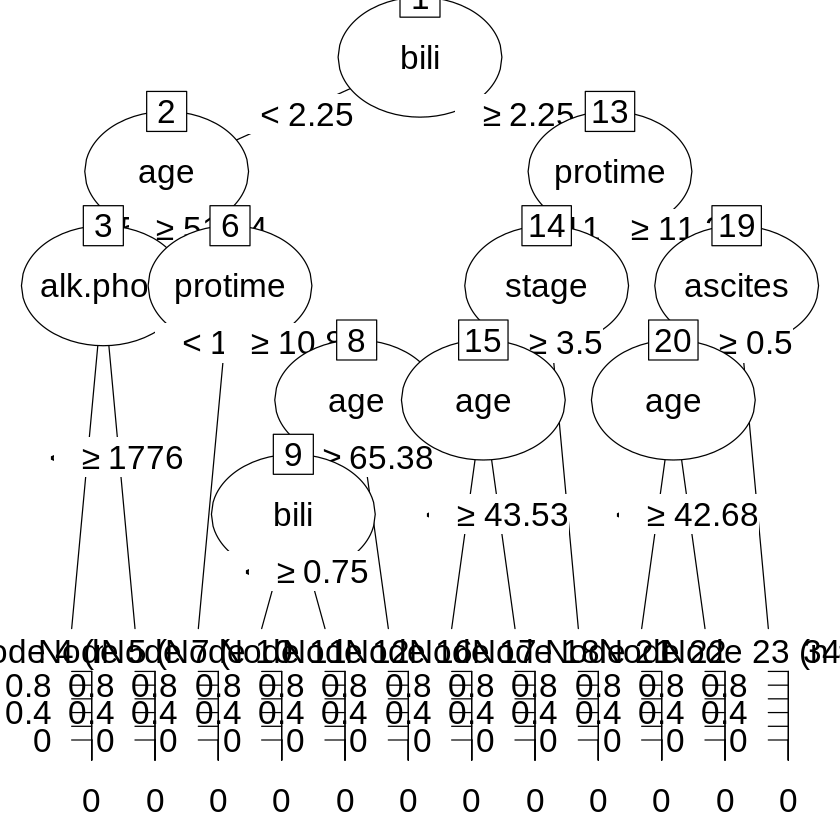

In [ ]:
pbc_party <- as.party(pbc_stree)
pbc_party
plot(pbc_party,gp = gpar(fontsize = 20))
pbc_predict <- predict(pbc_party,type="response")
unique(pbc_predict)
